## ERA5 time series

In this notebook, we will explore how to:
- Extract ERA5 reanalysis time series data for a single point from the C3S **Climate Data Store (CDS)**
- Calculate temporal statistics (e.g. daily minima, maxima and means)
- Visualise your results with **earthkit-plots**

### Components of earthkit

This tutorial uses the following earthkit components - click any logo to open the package documentation:

<div align="center">
  <br>
  <a href="https://earthkit-data.readthedocs.io/en/latest/" target="_blank" style="display:inline-block; margin: 0 15px;">
    <img src="https://raw.githubusercontent.com/ecmwf/logos/refs/heads/main/logos/earthkit/earthkit-data-light.svg" alt="earthkit-data" width="200">
  </a>
  <a href="https://earthkit-transforms.readthedocs.io/en/latest/" target="_blank" style="display:inline-block; margin: 0 15px;">
    <img src="https://raw.githubusercontent.com/ecmwf/logos/refs/heads/main/logos/earthkit/earthkit-transforms-light.svg" alt="earthkit-transforms" width="200">
  </a>
  <a href="https://earthkit-plots.readthedocs.io/en/latest/" target="_blank" style="display:inline-block; margin: 0 15px;">
    <img src="https://raw.githubusercontent.com/ecmwf/logos/refs/heads/main/logos/earthkit/earthkit-plots-light.svg" alt="earthkit-plots" width="200">
  </a>
</div>

> Note: some of the examples in this notebook require an optional dependency - the Python package **reverse-geocode**. This lets you easily look up the nearest location to a latitude-longitude point. To install it, uncomment the cell below and run it.

In [1]:
#!pip install reverse-geocode

In [2]:
import earthkit as ek

### 1. Retrieving ERA5 time series data

In this example, we’ll examine Northern Hemisphere Summer 2025 for a single point location. By default, we’ll use Reading, UK — one of ECMWF’s sites - but feel free to choose your own location by changing the latitude and longitude values in the CDS request.

>In order to access ERA5 renalysis data, you will need an account on the Copernicus Climate Data Store (CDS). If you do not have an account, please visit [the CDS website](https://cds.climate.copernicus.eu/#!/home) and register for an account. Then, [follow these instructions](https://cds.climate.copernicus.eu/how-to-api) (step 1 only) to set up your API key.

If you do not wish to set up a CDS account right now, you can still follow along with this notebook by accessing the Reading data sample from an open URL. To do this, simply uncomment the cell below and run it.

In [3]:
# ds = ek.data.from_source("sample", "era5-timeseries-nh-summer-2025.nc")

If you **do** have a CDS account, you can access the (ERA5 hourly time-series data on single levels from 1940 to present)[https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview] dataset, which provides super-fast access to point-based time series from ERA5 reanalysis from 1940 to present.

The following request will get you data for the grid point containing **Reading, UK** for summer 2025:

In [4]:
dataset = "reanalysis-era5-single-levels-timeseries"
request = {
    "variable": ["2m_temperature"],
    "location": {"longitude": -1, "latitude": 51.5},
    "date": ["2025-06-01/2025-09-30"],
    "data_format": "netcdf"
}

ds = ek.data.from_source("cds", dataset, request)

Since this is netCDF data, converting it to xarray gives us a good view of our data.

In [5]:
data = ds.to_xarray()
data

<xarray.Dataset> Size: 35kB
Dimensions:     (valid_time: 2928)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 23kB 2025-06-01 ... 2025-09-30T23...
    latitude    float64 8B ...
    longitude   float64 8B ...
Data variables:
    t2m         (valid_time) float32 12kB dask.array<chunksize=(2928,), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2024-09-02T04:48 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

### 2. Plotting a time series (new!)

In earthkit-plots version 0.5.0, a new (experimental) feature was released for plotting time series plots. The deisgn principle is to give you all the added value that you get from earthkit-plots maps, but for statistical plots:

⚙️ Automatic extraction of plot components (x and y)

📏 Unit conversion

🔍 Metadata templating in titles

✨ Reduced boilerplate vs raw matplotlib.

To get started, we can instantiate a `TimeSeries()` object jsut like we would a `Map()`.

/var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/ipykernel_70554/673217642.py:1: UserWarning: TimeSeries is an experimental new feature in earthkit-plots. We welcome feedback and bug reports on GitHub issues: https://github.com/ecmwf/earthkit-plots/issues
  chart = ek.plots.TimeSeries()


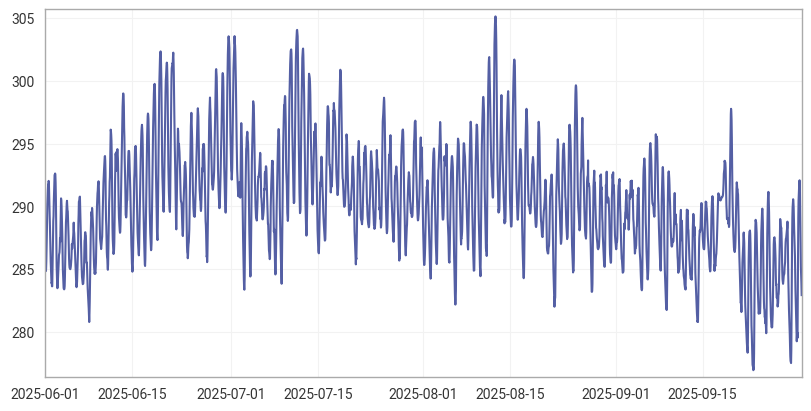

In [6]:
chart = ek.plots.TimeSeries()

# Plot our hourly data as a line
chart.line(data)

chart.show()

Notice that earthkit-plots identified the time dimension of the data and put it on the x-axis by default, reducing the padding on the left and right edges to contain the data.

### 3. Customising the plot

Now let's:
- convert the units to celsius
- change the line colour
- add a title and a label for the y-axis

/var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/ipykernel_70554/1482338085.py:1: UserWarning: TimeSeries is an experimental new feature in earthkit-plots. We welcome feedback and bug reports on GitHub issues: https://github.com/ecmwf/earthkit-plots/issues
  chart = ek.plots.TimeSeries()


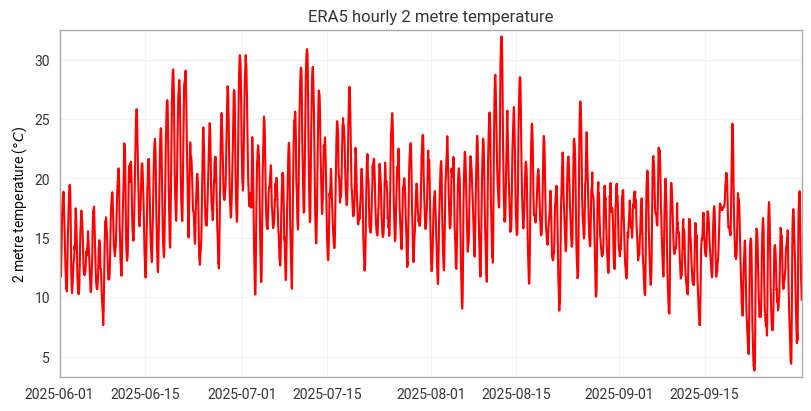

In [7]:
chart = ek.plots.TimeSeries()

chart.line(
    data,
    units="celsius",
    color="red",
)

# The label string is automatic, based on the data and the units
chart.ylabel()

# You can use metadata templating in titles just like with map plots
chart.title("ERA5 hourly {variable_name}")

chart.show()

### 4. Changing the plot orientation

In some cases, you may wish to flip your axes. With **earthkit-plots**, this is as straightforward as choosing which variable/coordinate/dimension you would like on each axis.

> Note that you only need to specify one axis, like below where we specify `y="valid_time"`. Try experimenting with `x="t2m"` - it works just the same.

/var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/ipykernel_70554/4033163876.py:1: UserWarning: TimeSeries is an experimental new feature in earthkit-plots. We welcome feedback and bug reports on GitHub issues: https://github.com/ecmwf/earthkit-plots/issues
  chart = ek.plots.TimeSeries(size=(4, 8))


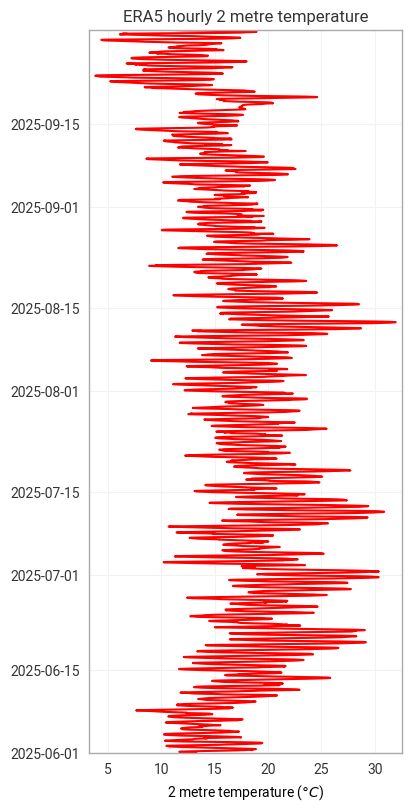

In [8]:
chart = ek.plots.TimeSeries(size=(4, 8))

chart.line(
    data,
    y="valid_time", # put valid_time on the y-axis
    units="celsius",
    color="red",
)

chart.xlabel()

chart.title("ERA5 hourly {variable_name}")

chart.show()

### 5. Enhancing ticks and formatting

Now let's add a nicer title and format the time ticks better for clarity.

Here we are adding more metadata keys ot the title, including:
- latitude and longitude, with magic formatters (`%Lt` and `%Ln`) to easily add cardinal directions
- location (requires the `reverse-geocode` library to have been installed at the top of this notebook!), which can be formatted to show the closest city (`%c`) or country (`%C`) to the latitude and longitude point

We are also formatting the x (time) axis with:
- `frequency="M"`: show one tick every month
- `format="%B"`: show the full month name
- `period=True`: place the labels in the center of each period

/var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/ipykernel_70554/661091448.py:1: UserWarning: TimeSeries is an experimental new feature in earthkit-plots. We welcome feedback and bug reports on GitHub issues: https://github.com/ecmwf/earthkit-plots/issues
  chart = ek.plots.TimeSeries()


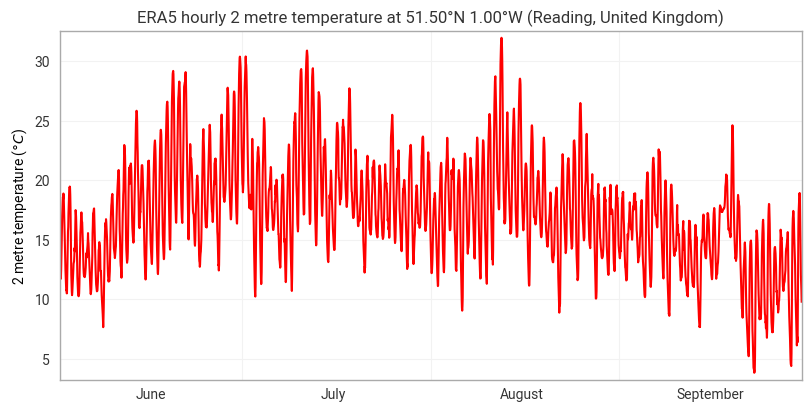

In [9]:
chart = ek.plots.TimeSeries()

chart.line(data, units="celsius", color="red")

chart.title("ERA5 hourly {variable_name} at {latitude:%Lt} {longitude:%Ln} ({location:%c}, {location:%C})")

chart.ylabel()

chart.xticks(
    frequency="M",
    format="%B",
    period=True,
)

chart.show()

### 6. Adding daily statistics

Finally, let's do something a bit more interesting by calculating daily minimum and maximum temperatures, and adding them to the plot. We can do this easily with earthkit-transforms:

/var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/ipykernel_70554/3457273697.py:4: UserWarning: TimeSeries is an experimental new feature in earthkit-plots. We welcome feedback and bug reports on GitHub issues: https://github.com/ecmwf/earthkit-plots/issues
  chart = ek.plots.TimeSeries()


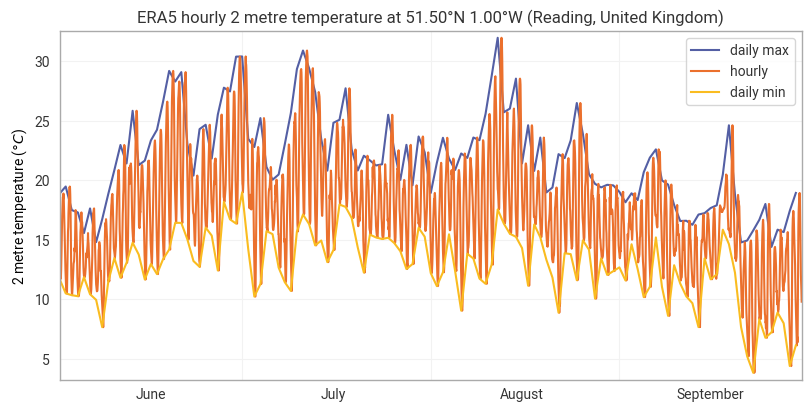

In [10]:
daily_max = ek.transforms.temporal.daily_max(data).rename({"t2m": "daily max"})
daily_min = ek.transforms.temporal.daily_min(data).rename({"t2m": "daily min"})

chart = ek.plots.TimeSeries()

chart.line(daily_max, units="celsius", label="{name}")
chart.line(data, units="celsius", label="hourly")
chart.line(daily_min, units="celsius", label="{name}")

chart.title("ERA5 hourly {variable_name} at {latitude:%Lt} {longitude:%Ln} ({location:%c}, {location:%C})")

chart.ylabel()

chart.xticks(
    frequency="M",
    format="%B",
    period=True,
)

chart.legend()

chart.show()

### Exercises

1. Produce a time series plot for a different location for summer 2025.
1. Calculate the daily **mean** temperature, and plot that between the daily min and daily max (instead of the hourly temperature).
1. Request `total_precipitation` from ERA5 and calculate the daily mean precipitation. Then, plot this as a bar chart. (Hint: you can call `TimeSeries.bar()` instead of `TimeSeries.line()`).